# Final Project Submission

* Student name: Jonathan Lee
* Student pace: Full Time
* Scheduled project review date/time: May 26, 2pm
* Instructor name: James Irving
* Blog post URL: https://github.com/ds-papes/dsc-phase-3-project

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

## Business Problem

Just like in any traditional sports, there are multiple elements  eSports there are many different aspects of a match that contribute to the outcome of either a win or a loss. This analysis focuses on using various machine learning algorithms to create a model based on data collected within the first 10 minutes of a high-ranking League of Legends match which as accurately as possible predicts the outcome of the match. Based on the resulting models, we will identify what elements of the game have the highest impact on the outcome of a match, and how an eSports coach should plan his/her team's training program.

# OBTAIN

## Data Understanding

The data we will use to perform this analysis was obtained from [this](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min) Kaggle dataset which was obtained via the Riot API. It includes data from 9,879 high ranking (Diamond I to Master) competitive matches with 19 features per team and one target variable which indicates whether the match resulted in a win for the blue team.

<b>Glossary of Features:</b>

- Ward: An item that players can place on the map to reveal the nearby area. Very useful for map/objectives control.
- Assist: Awards partial gold and experience points when damage is done to contribute to an enemy's death.
- Elite Monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
- Dragon: AKA Drake. This powerful neutral monster grants various permanent effects and buffs when when killed by a team.
- Herald: A monster that spawns on the eigth minute. Grants a buff that allows the user to spawn the Herald for your team to help push towers and lanes.
- Tower: A structure that blocks the enemy’s path to the base. They take high damage and fire at opponents within a certain radius.
- Gold: Currency awarded for killing monsters or enemy players as well as for completing objectives.
- Level: Champion level. Start at 1. Max is 18.
- Minions: Non-player characters (NPCs) that spawn from each team’s base.
- Jungle Minions: NPC that belong to NO TEAM. They give gold and temporary buffs when killed by players.

In [1]:
# Import packages to be used in notebook.
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

from xgboost import XGBRFClassifier, XGBClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load data and display basic info.
df = pd.read_csv('data/high_diamond_ranked_10min.csv')
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


None

We have all numerical data and fortunately no null values to address. However, we have more columns than the default display allows us to see, so we will adjust the pandas display option. 

In [3]:
# Set maximum number of columns displayed to 40.
pd.set_option('display.max_columns', 40)
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


# SCRUB

## Data Preparation

Since this dataset was collected via Riot's API, we will trust that the data is accurate and not perform any outlier removal. Another reason for including outliers in our analysis is to consider whether outliers in certain features have an impact on the outcome of a match. We also do not have any null values to address, and so we will use this stage of the analysis to create different versions of this dataset using different features to examine whether we can obtain different results during the modeling process.

The two different datasets we will prepare are as follows:
- df_big: Unaltered dataframe with all original features included.
- df_select: Altered dataframe with aggregate columns removed and only controllable features included. These included features will also be easier to interpret, since we do not have any vague aggregate features such as total gold or total experience.

In [4]:
# Drop gameId column, since this is simply an identifier for each match
# and should not be included as part of our models.
df.drop('gameId', axis=1, inplace=True)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
# Create df with no removed features.
df_big = df.copy()

In [6]:
# Create df with only target variable and directly controllable aspects of 
# the game.
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,195,36,15,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,174,43,12,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,186,46,15,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,201,55,15,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,210,57,17,2,1,6,6,7,1,0,0,225,67


# EXPLORE

At this stage, we will examine if there are any redundant features in our two datasets and if there is any high multicollinearity that we might need to address.

TotalExperience and TotalGold are both features that are aggregates of the other columns, so we will explore some visualizations to determine whether we can expect a correlation with our target variable.

In [7]:
# Create functions to easily visualize correlation as well as general 
# data distribution and outliers.

def corr_heatmap(df, digits=3, cmap='coolwarm'):
    """
    Creates a correlation heatmap to easily visualize multicollinearity
    that might be present in the dataframe.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        digits (int) : Number of decimal places to display
        cmap (str) : Colormap to display correlation range.

    Returns:
        fig : Matplotlib Figure
        ax : Matplotlib Axis
    """
    # Create correlation matrix from dataframe
    correl = df.corr().round(digits)
    correl

    # Create mask for upper triangle of matrix
    mask = np.zeros_like(correl)
    mask[np.triu_indices_from(mask)] = True

    #Create heatmap correlation matrix
    fig, ax = plt.subplots(figsize=((len(df.columns)),(len(df.columns))))
    sns.heatmap(correl, annot=True, ax=ax, cmap=cmap, vmin=-1, vmax=1,\
                mask=mask);
    return fig, ax

    
def visual_eda(df, target, col):
    """
    Plots a histogram + KDE, boxplot, and scatter plot with linear regression 
    line of the specified column. Use to visualize shape of data, outliers, 
    and check column's correlation with target variable.

    Args:
        df (DataFrame) : DataFrame containing column to plot
        target (str) : Name of target variable.
        col (str) : Name of the column to plot.

    Returns:
        fig : Matplotlib Figure
        gs : Matplotlib GridSpec
    """
    # Create copy variables of df and col
    data = df[col].copy()
    name = col

    # Calc mean and mean
    median = data.median().round(2)
    mean = data.mean().round(2)
    
    
    # Create gridspec for plots
    fig = plt.figure(figsize=(11, 6))
    gs = GridSpec(nrows=2, ncols=2)

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[:, 1])

    # Plot distribution 
    sns.histplot(data,alpha=0.5,stat='density',ax=ax0)
    sns.kdeplot(data,color='green',label='KDE',ax=ax0)
    ax0.set(ylabel='Density',title=name)
    ax0.set_title(F"Distribution of {name}")
    ax0.axvline(median,label=f'median={median:,}',color='black')
    ax0.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    ax0.legend()

    # Plot Boxplot
    sns.boxplot(data,x=col,ax=ax1)
    ax1.set_title(F"Box Plot of {name}")

    # Plot Scatterplot to illustrate linearity
    sns.regplot(data=df, x=col, y=target, line_kws={"color": "red"}, ax=ax2)
    ax2.set_title(F"Scatter Plot of {name}")

    # Tweak Layout & Display
    fig.tight_layout()
   
    return fig, gs

(<Figure size 2808x2808 with 2 Axes>, <AxesSubplot:>)

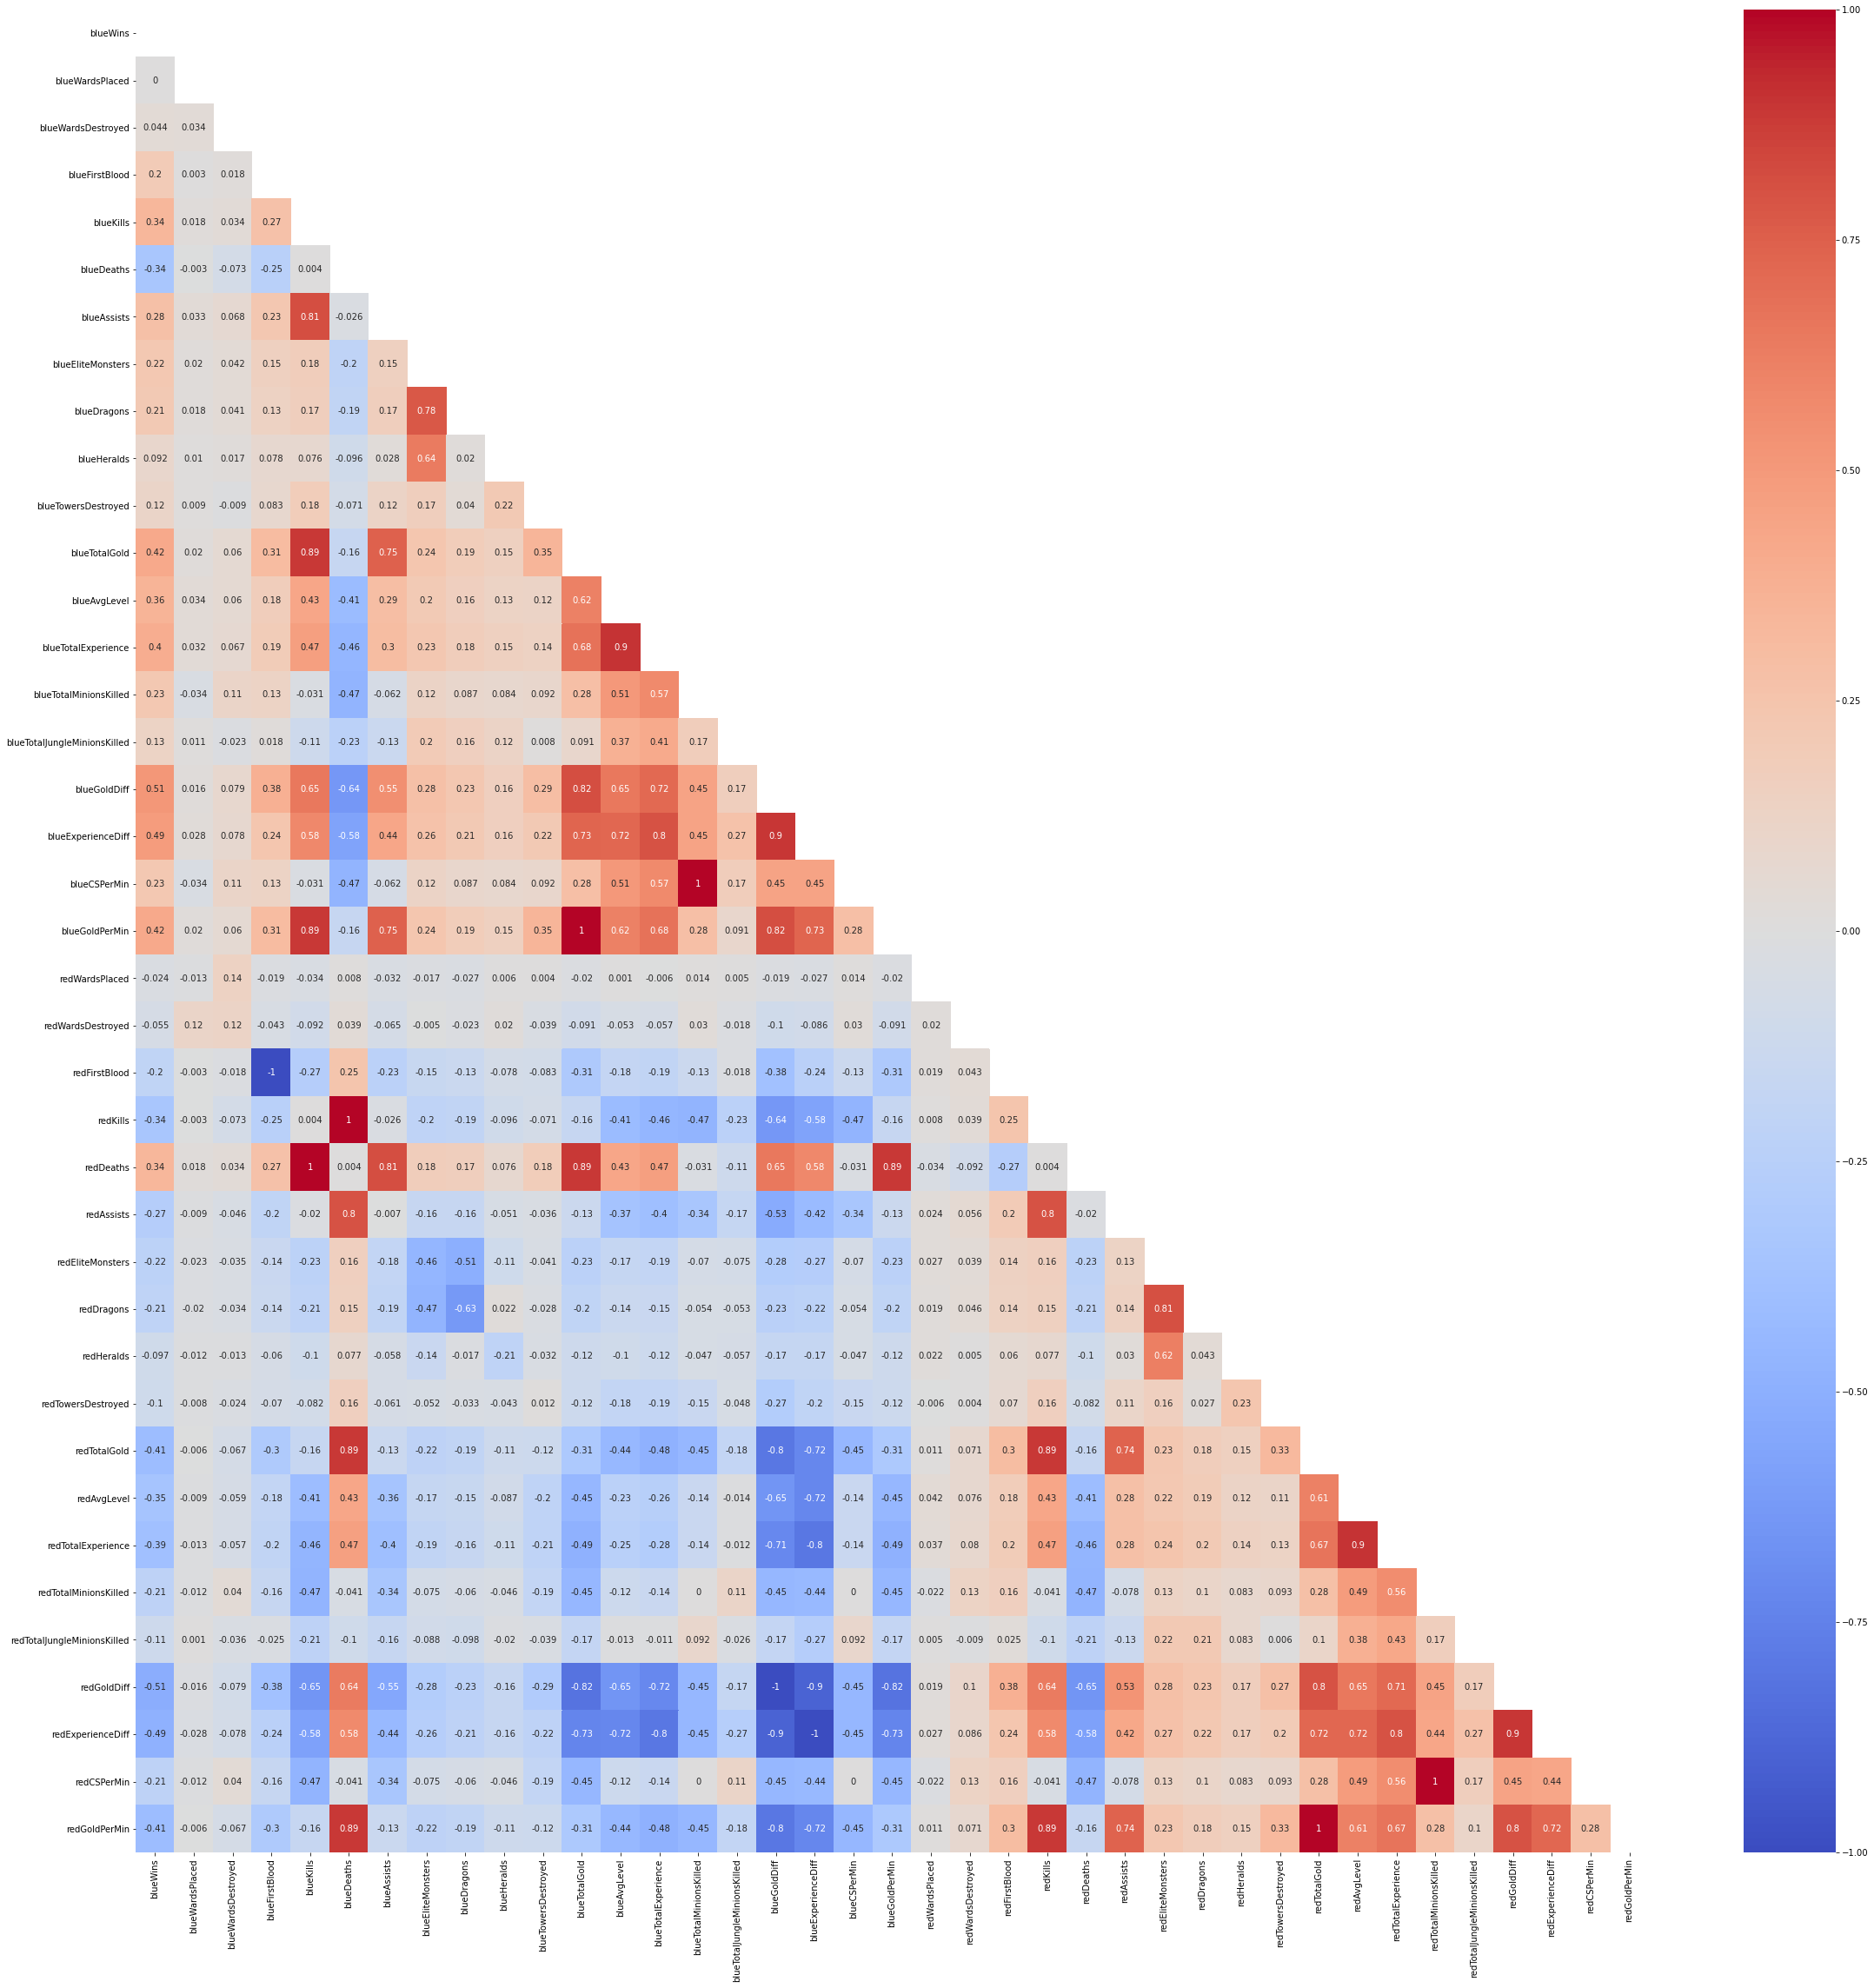

In [8]:
# Create correlation heatmap for df_big.
corr_heatmap(df_big)

We can see that there are multiple features that have high multicollinearity. This is a big problem when considering a logistic regression, and so we will avoid using df_big for our logistic regression model.

(<Figure size 1656x1656 with 2 Axes>, <AxesSubplot:>)

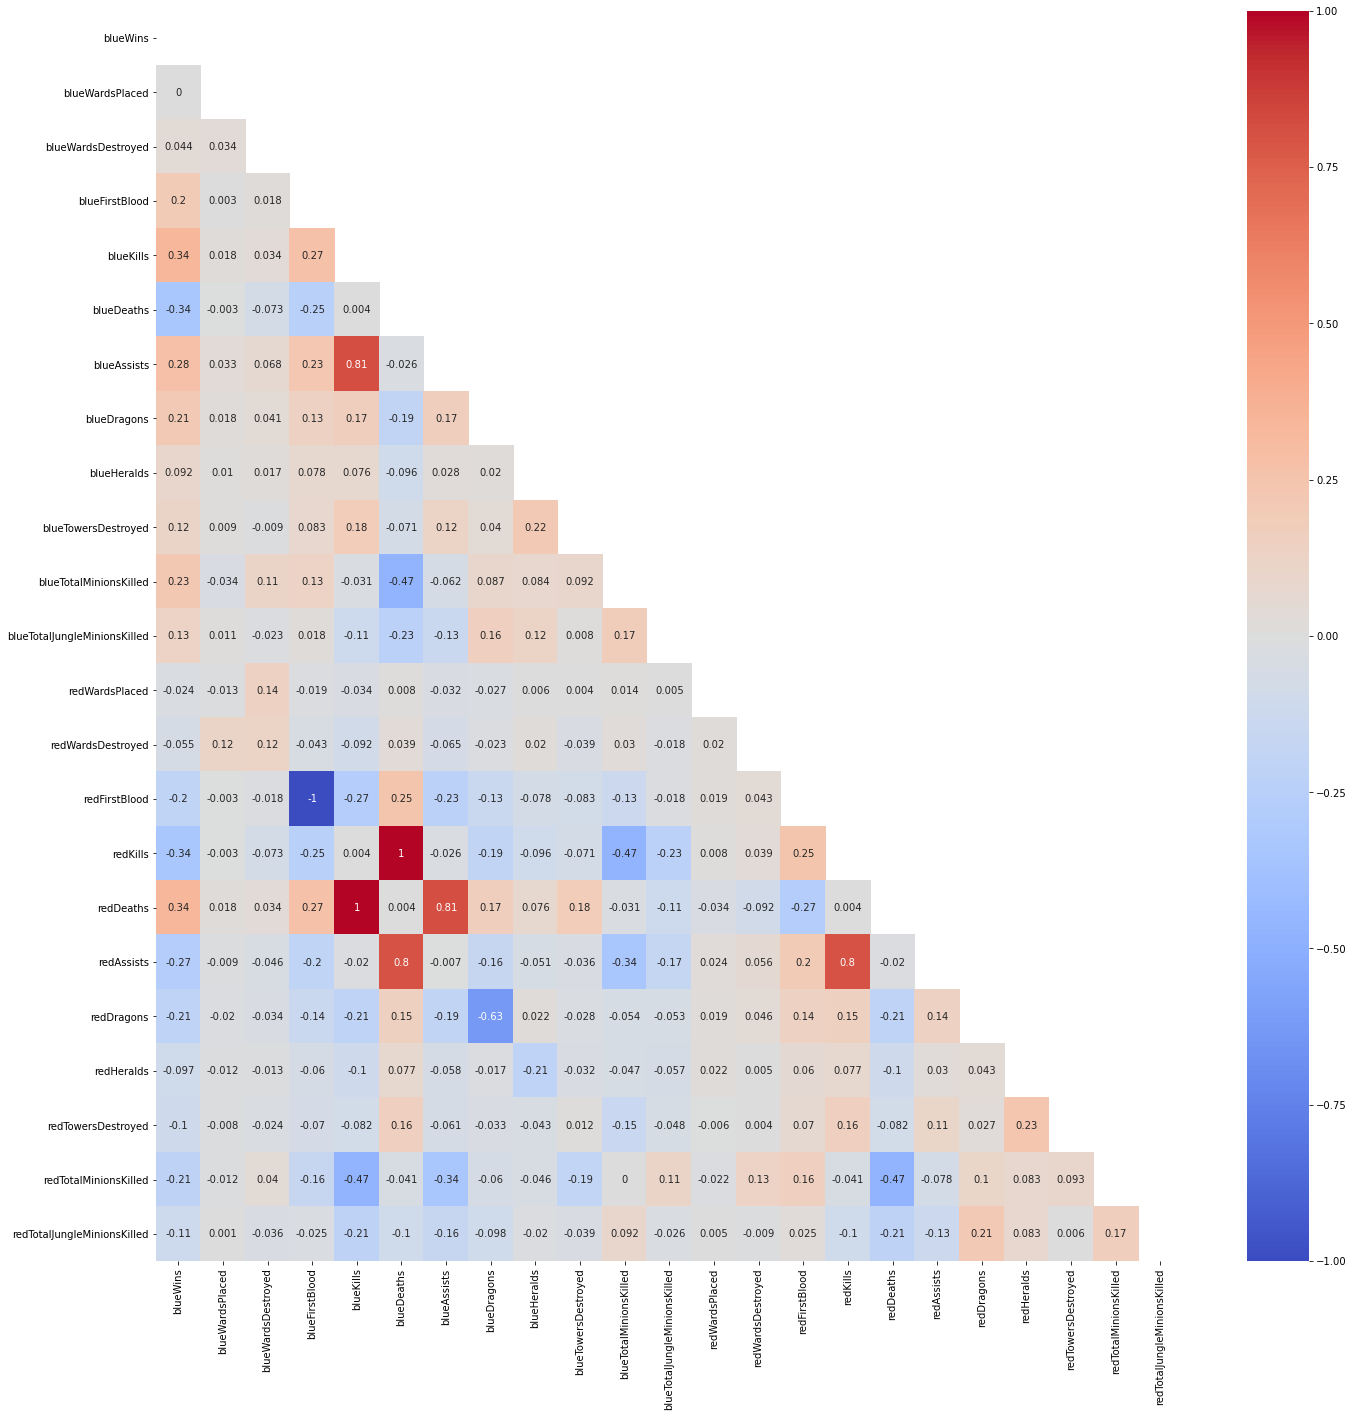

In [9]:
# Create correlation heatmap for df_select.
corr_heatmap(df_select)

Even though multicollinearity is not as much of an issue in this dataframe, we still have some features with perfect multicollinearity: redFirstBlood, redKills, and redDeaths. These features are perfect inverses of blueFirstBlood, blueDeaths, and blueKills respectively, and so we will go ahead and remove those columns to prepare our dataset for logistic regression.

In [10]:
# Drop highly columns with high multicollinearity.
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

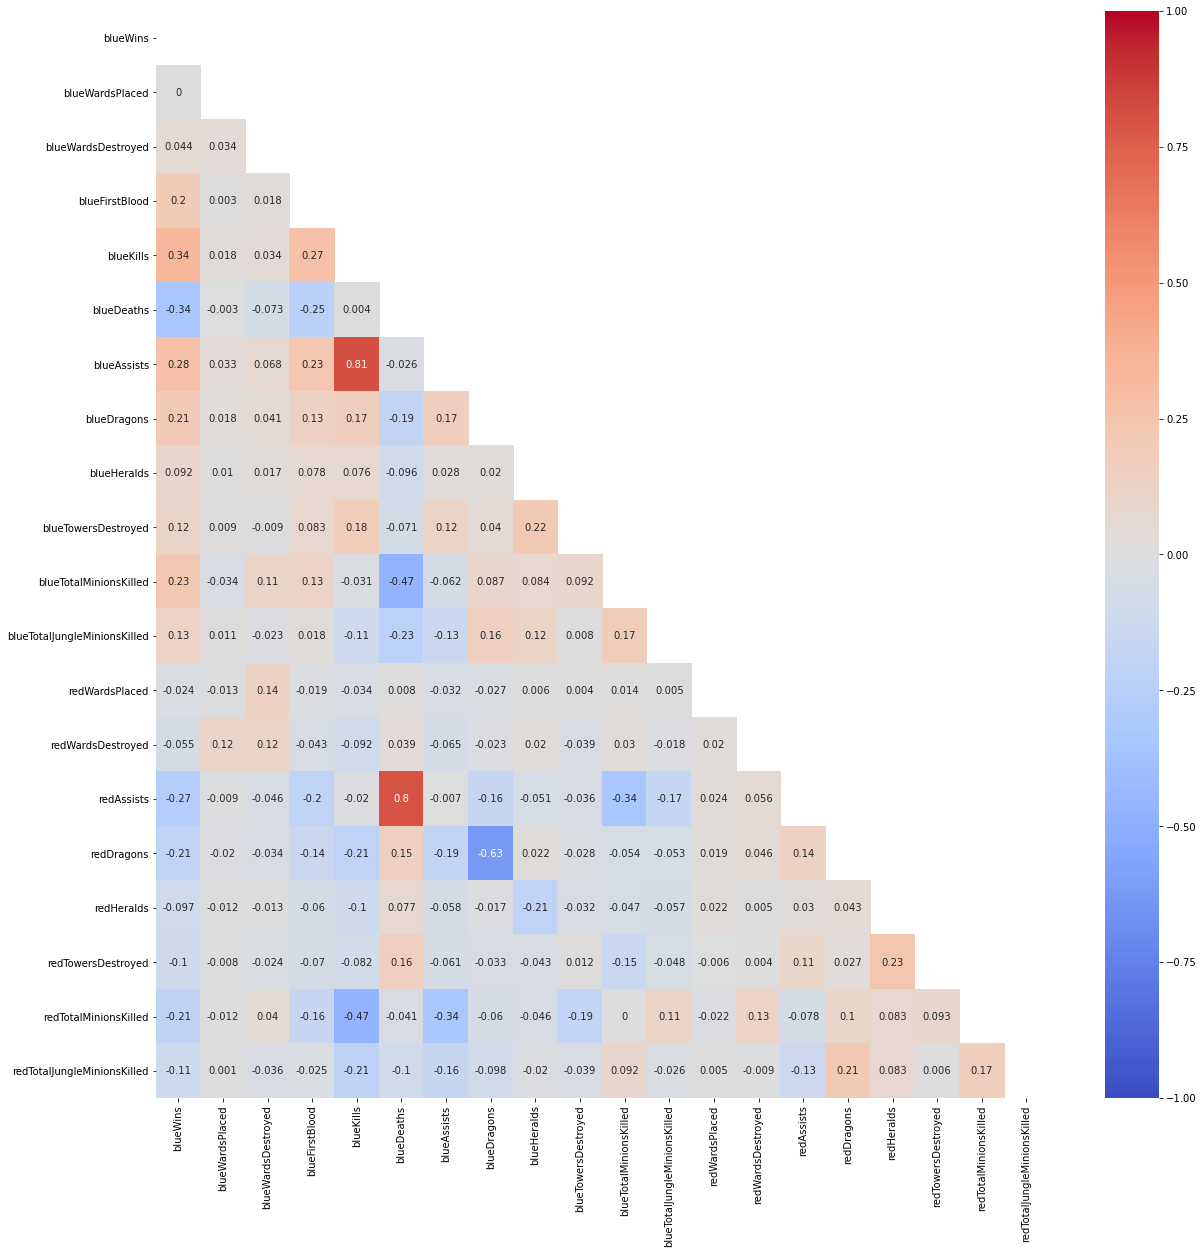

In [11]:
# Create correlation heatmap to verify that we no longer have 
# multicollinearity.
corr_heatmap(df_select)

Although redAssists and blueAssists do have some with blueDeaths and blueKills respectively, we will leave those features in our dataframe since the correlation coefficients are not too high, and the impact of assists on the match outcome is still important to our analysis.

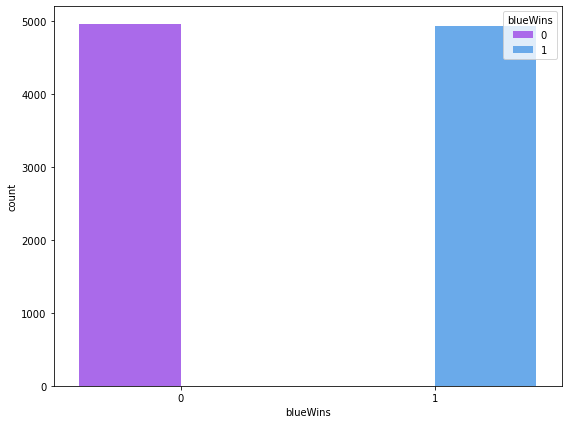

In [12]:
# Plot histogram
fig, ax = plt.subplots(figsize=(8,6))
# sns.histplot(x='blueWins', data=diff_df, hue='blueWins', palette='Set1',bins=(2), kde=False)
sns.countplot(x='blueWins', data=df_select, hue='blueWins', palette='cool_r')

# Save as image
plt.tight_layout()

We can also see that we do not have an issue of class imbalance in this dataset.

Next, we will examine the general distribution how the total experience and gold are correlated with our target variable in addition to their distributions and outliers.

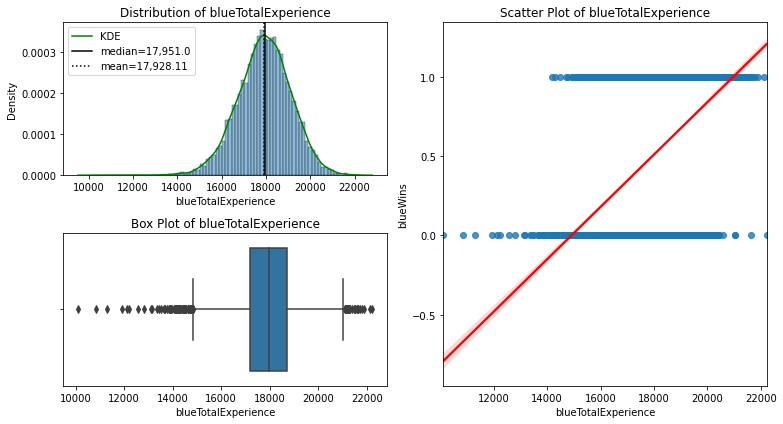

In [13]:
# Plot visualization for blueTotalExperience vs blueWins.
visual_eda(df_big, 'blueWins', 'blueTotalExperience');

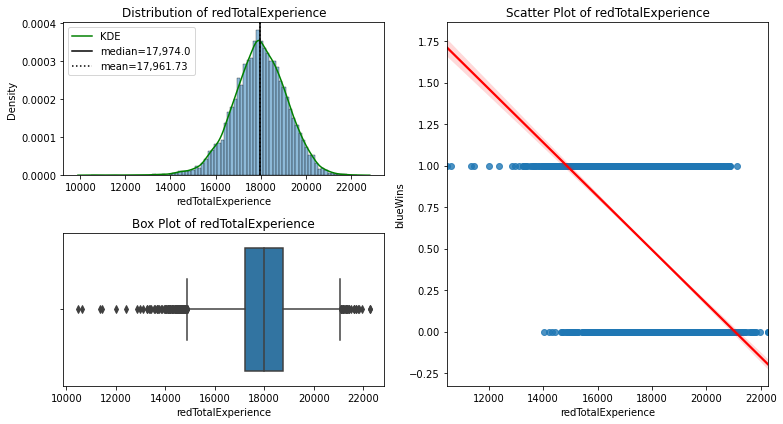

In [14]:
# Plot visualization for redTotalExperience vs blueWins.
visual_eda(df_big, 'blueWins', 'redTotalExperience');

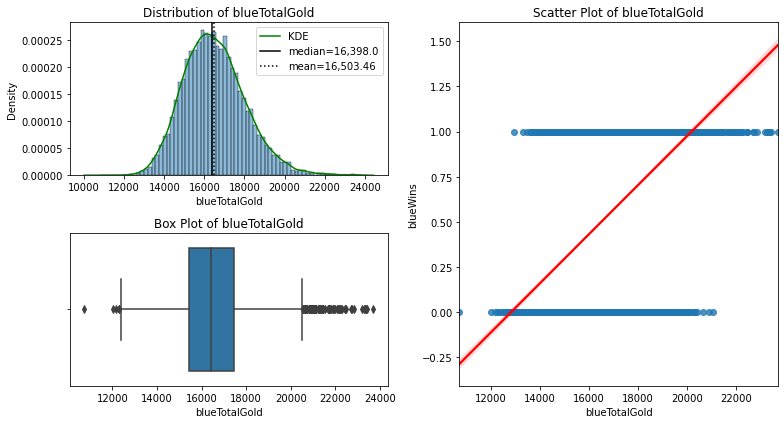

In [15]:
# Plot visualization for blueTotalGold vs blueWins.
visual_eda(df_big, 'blueWins', 'blueTotalGold');

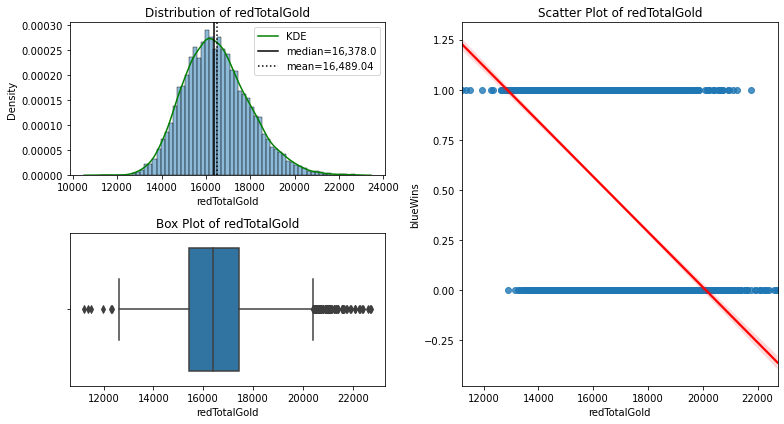

In [16]:
# Plot visualization for redTotalGold vs blueWins.
visual_eda(df_big, 'blueWins', 'redTotalGold');

Again, we can see that we do have a lot of outliers, but the distribution of each of these features is normal. As you might have expected, we can see a generally negative correlation between red total gold and experience and a blue win, with a generally positive correlation between blue total gold and experience and a blue win.

# MODEL

## Data Modeling
Now that we have seen that there is some relationship between the total experience and gold and a team's win, we want to dive deeper into creating a model that puts together our features to as accurately as possible predict the outcome of a match and to identify which features have the highest impact on the match outcome.

In this section, we will cover the following three model types:
1. Logistic Regression
2. Random Forest
3. XGBoost: Random Forest

Logistic Regression will be the least computationally costly model, and so we will use this as a baseline to compare our other models and determine whether there is any value to using more complex models.

We will then move onto Random Forest and XGBoost models to see whether an ensemble method might provide a better predictive model, while also keeping in consideration the issue of overfitting.

For our Logistic Regression model, we will only use df_select since we have addressed the issue of multicollinearity specifically for this model. For our ensemble methods, we will pass through both df_select and df_big to determine whether a collection of all features provides us with better predictive ability than when we include only a subset of features.

In [17]:
# Create functions to facilitate scaling, fiting and evaluating multiple 
# dataframes.

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
    """
    Displays evaluation metrics including classification report, confusion
    matrix, ROC-AUC curve.
    
    If the argument 'params' is passed, will display a table of the 
    parameters hyperparameters used in the model.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
    """
        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    
def split_scale(df, target, scaler=StandardScaler()):
    """
    Creates train-test splits and scales training data.

    Args:
        df (DataFrame): DataFrame with features and target variable.
        target (str): Name of target variable.
        scaler (scaler object): Scaler to use on features DataFrame. Default
                                is StandardScaler.
        
    Returns:
        X_train (DataFrame) : Training data with scaled feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with scaled feature variables.
        y_test (Series) : Testing data with target variable.
    """
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):
    """
    Fits model on training data and displays classification evaluation metrics.

    Args:
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
        model (classifier object) : Model after fitting on training data.
    """
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [18]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'blueWins')
X_train_big, X_test_big, y_train_big, \
             y_test_big = split_scale(df_big, 'blueWins')

## Basic Logistic Regression on df_select

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7207    0.7256    0.7231      3713
           1     0.7224    0.7175    0.7200      3696

    accuracy                         0.7216      7409
   macro avg     0.7216    0.7215    0.7215      7409
weighted avg     0.7216    0.7216    0.7215      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7268    0.7298    0.7283      1236
           1     0.7282    0.7253    0.7268      1234

    accuracy                         0.7275      2470
   macro avg     0.7275    0.7275    0.7275      2470
weighted avg     0.7275    0.7275    0.7275      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


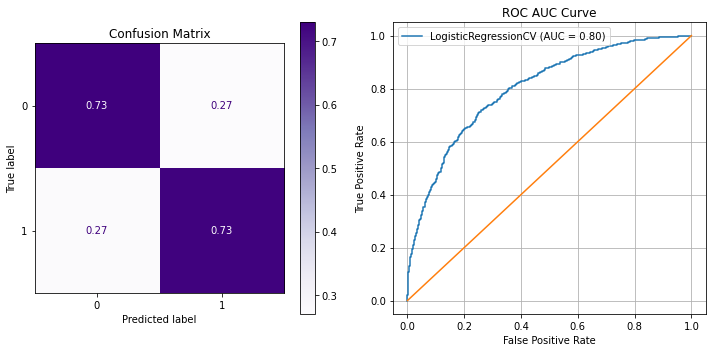

In [19]:
# Fit and evaluate df_select on a Logistic Regression model.
log_select = fit_eval(LogisticRegressionCV(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

Not a bad starting point! We can see that our macro recall score is 0.7215 on the training data, on our test data received a macro recall score of 0.7275, meaning that of the true wins and losses, our Logistic Regression model is predicting 72.75% of them correctly. We also do not have an issue of under or overfitting.

## GridSearch CV - Logistic Regression on df_select

In [20]:
# Create parameter grid for Logistic Regression gridsearch and fit to data.
log_reg = LogisticRegression(random_state=42)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1e6,1e12],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'fit_intercept': [True, False],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid = GridSearchCV(log_reg, params, scoring='recall_macro')
log_grid.fit(X_train_select, y_train_select)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000000.0,
                               1000000000000.0],
                         'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

In [21]:
# Print best params for log_grid
log_grid.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'penalty': 'l2',
 'solver': 'lbfgs'}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7203    0.7242    0.7223      3713
           1     0.7214    0.7175    0.7195      3696

    accuracy                         0.7209      7409
   macro avg     0.7209    0.7209    0.7209      7409
weighted avg     0.7209    0.7209    0.7209      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7246    0.7257    0.7251      1236
           1     0.7248    0.7237    0.7242      1234

    accuracy                         0.7247      2470
   macro avg     0.7247    0.7247    0.7247      2470
weighted avg     0.7247    0.7247    0.7247      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


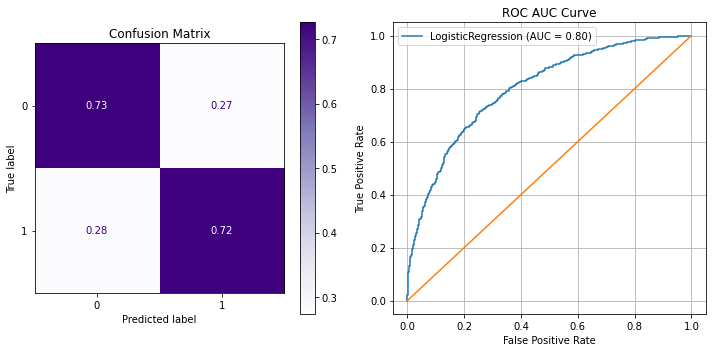

****MODEL PARAMETERS****


,parameters
C,0.1
class_weight,balanced
dual,False
fit_intercept,False
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [22]:
# Evaluate best estimating model.
evaluate_model(log_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

We can see a slight decline in the recall score compared to our base Logistic Regression model. Let's see if we can tune our hyperparameters to improve our score.

In [23]:
# Create parameter grid for Logistic Regression gridsearch and fit to data.
log_reg_ref = LogisticRegression(random_state=42)

params = {'C': [0.0001, 0.001],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid_refined = GridSearchCV(log_reg_ref, params, scoring='recall_macro')
log_grid_refined.fit(X_train_select, y_train_select)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.0001, 0.001], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

In [24]:
# Print best params for log_grid_refined
log_grid_refined.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'penalty': 'l2',
 'solver': 'liblinear'}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7185    0.7199    0.7192      3713
           1     0.7181    0.7167    0.7174      3696

    accuracy                         0.7183      7409
   macro avg     0.7183    0.7183    0.7183      7409
weighted avg     0.7183    0.7183    0.7183      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7166    0.7241    0.7203      1236
           1     0.7207    0.7131    0.7169      1234

    accuracy                         0.7186      2470
   macro avg     0.7186    0.7186    0.7186      2470
weighted avg     0.7186    0.7186    0.7186      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


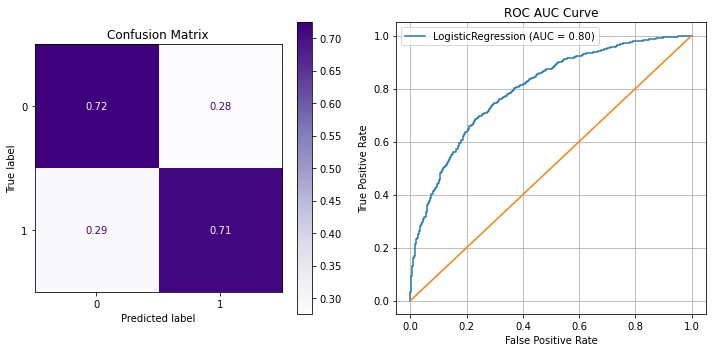

****MODEL PARAMETERS****


,parameters
C,0.001
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [25]:
# Evaluate best estimating model.
evaluate_model(log_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

We can see that our recall score is continuing to drop, and so we can see that we may have hit the maximum score possible with a Logistic Regression. Hence, we will keep <i>log_select</i> as our best Logistic Regression model so far.

## Random Forest

### df_select

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3713
           1     1.0000    1.0000    1.0000      3696

    accuracy                         1.0000      7409
   macro avg     1.0000    1.0000    1.0000      7409
weighted avg     1.0000    1.0000    1.0000      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7158    0.7314    0.7235      1236
           1     0.7249    0.7091    0.7169      1234

    accuracy                         0.7202      2470
   macro avg     0.7203    0.7202    0.7202      2470
weighted avg     0.7203    0.7202    0.7202      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


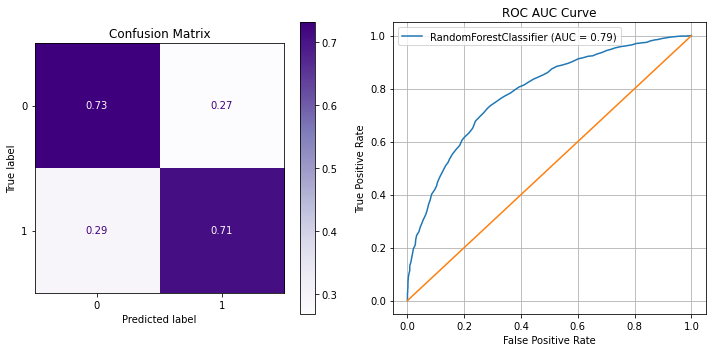

RandomForestClassifier(random_state=42)

In [26]:
# Fit and evaluate Random Forest on df_select.
fit_eval(RandomForestClassifier(random_state=42), X_train_select, \
         y_train_select, X_test_select, y_test_select)

### df_big

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3713
           1     1.0000    1.0000    1.0000      3696

    accuracy                         1.0000      7409
   macro avg     1.0000    1.0000    1.0000      7409
weighted avg     1.0000    1.0000    1.0000      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7173    0.7371    0.7271      1236
           1     0.7292    0.7091    0.7190      1234

    accuracy                         0.7231      2470
   macro avg     0.7232    0.7231    0.7230      2470
weighted avg     0.7232    0.7231    0.7230      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


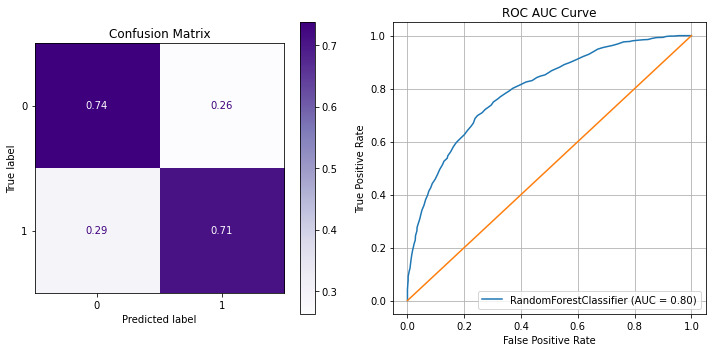

RandomForestClassifier(random_state=42)

In [27]:
# Fit and evaluate Random Forest on df_big. 
fit_eval(RandomForestClassifier(random_state=42), X_train_big, y_train_big, \
                                                  X_test_big, y_test_big)

Although the recall scores from our Random Forest models being run on the test data are similar to that which we saw in our Logistic Regression, we can immediately see that we have an major issue of overfitting, as this model scores perfectly on the training data. In order to prevent overfitting, we will ideally use a gridsearch to find the optimal hyperparameters for this model and data.

## XGBoost: Random Forest

### df_select

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7437    0.7315    0.7375      3713
           1     0.7346    0.7468    0.7406      3696

    accuracy                         0.7391      7409
   macro avg     0.7392    0.7391    0.7391      7409
weighted avg     0.7392    0.7391    0.7391      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7127    0.7063    0.7095      1236
           1     0.7084    0.7147    0.7116      1234

    accuracy                         0.7105      2470
   macro avg     0.7105    0.7105    0.7105      2470
weighted avg     0.7105    0.7105    0.7105      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


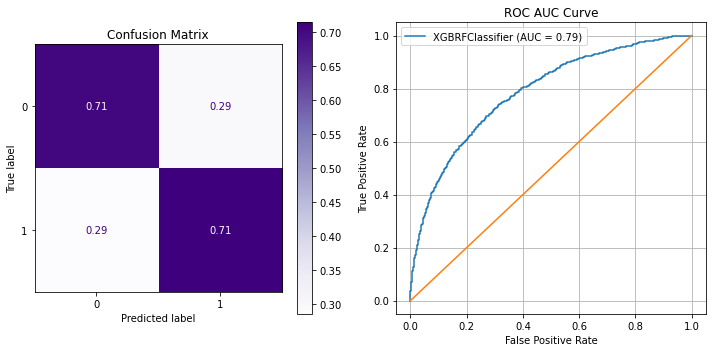

In [28]:
# Fit and evaluate XGBoost on df_select.
xgb_select = fit_eval(XGBRFClassifier(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

### df_big

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7546    0.7643    0.7594      3713
           1     0.7601    0.7503    0.7552      3696

    accuracy                         0.7573      7409
   macro avg     0.7574    0.7573    0.7573      7409
weighted avg     0.7574    0.7573    0.7573      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7053    0.7338    0.7193      1236
           1     0.7221    0.6929    0.7072      1234

    accuracy                         0.7134      2470
   macro avg     0.7137    0.7133    0.7132      2470
weighted avg     0.7137    0.7134    0.7132      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


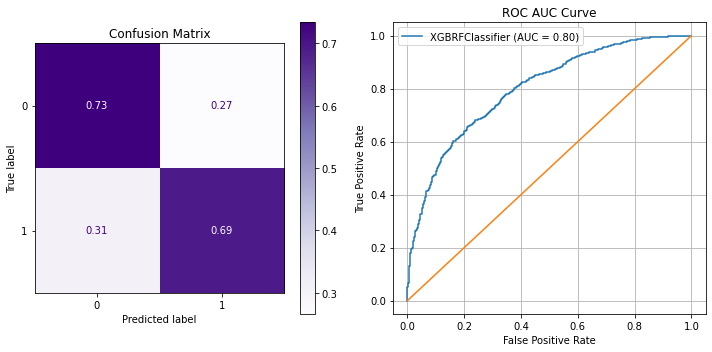

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=42, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [29]:
# Fit and evaluate XGBoost on df_big.
fit_eval(XGBRFClassifier(random_state=42), \
         X_train_big, y_train_big, X_test_big, y_test_big)

We can see that using the base XGBoost model, we a similar recall score to our Random Forest model. The issue of overfitting has also been somewhat solved, but we do want to see if we can further address this issue.

We will proceed to use a gridsearch on our XGBoost model and Logistic Regression model to see if we can completely address the issue of overfitting as well as hopefully improving our recall score.

## GridSearch CV - XGBoost: Random Forest on df_select

Next, we will try to improve our recall score on our XGBoost model while addressing the slight issue of overfitting. Although we had a slightly better recall score on df_big where we left our features unaltered, a 0.3% improvement in score is not worth sacrificing our feature explainability, so we will proceed with df_select.

In [30]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.03, 0.05, 0.06],
          'max_depth': [4, 5, 6],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.4, 0.5],
          'n_estimators': [100]}
xgb_grid = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid.fit(X_train_select, y_train_select)

GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=42, reg_alpha=None,
                                       scale_pos_weight=None, tree_method=None,
                                       validate_parameters=None,
             

In [31]:
# Print best params for xgb_grid
xgb_grid.best_params_

{'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.3}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7431    0.7361    0.7395      3713
           1     0.7373    0.7443    0.7408      3696

    accuracy                         0.7402      7409
   macro avg     0.7402    0.7402    0.7402      7409
weighted avg     0.7402    0.7402    0.7402      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7172    0.7120    0.7146      1236
           1     0.7136    0.7188    0.7162      1234

    accuracy                         0.7154      2470
   macro avg     0.7154    0.7154    0.7154      2470
weighted avg     0.7154    0.7154    0.7154      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


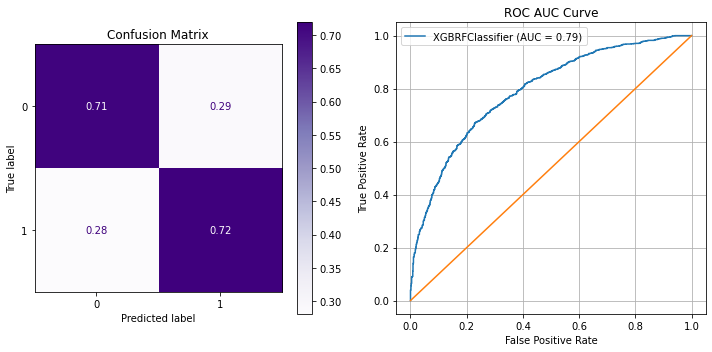

****MODEL PARAMETERS****


,parameters
colsample_bynode,0.8
learning_rate,0.03
reg_lambda,1e-05
subsample,0.3
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bytree,1
gamma,0


In [32]:
# Evaluate best estimating model.
evaluate_model(xgb_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

We see an improvement in our recall score by 0.49% which is tiny, but let's see if we can tune our hyperparameters a bit further.

In [33]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf_ref = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.0001, 0.001],
          'max_depth': [6, 7, 8],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.5, 0.7],
          'n_estimators': [100]}
xgb_grid_refined = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid_refined.fit(X_train_select, y_train_select)

GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=42, reg_alpha=None,
                                       scale_pos_weight=None, tree_method=None,
                                       validate_parameters=None,
             

In [34]:
# Print best params
xgb_grid_refined.best_params_

{'learning_rate': 0.001,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.3}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7513    0.7436    0.7474      3713
           1     0.7450    0.7527    0.7489      3696

    accuracy                         0.7481      7409
   macro avg     0.7482    0.7482    0.7481      7409
weighted avg     0.7482    0.7481    0.7481      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7188    0.7136    0.7162      1236
           1     0.7152    0.7204    0.7178      1234

    accuracy                         0.7170      2470
   macro avg     0.7170    0.7170    0.7170      2470
weighted avg     0.7170    0.7170    0.7170      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


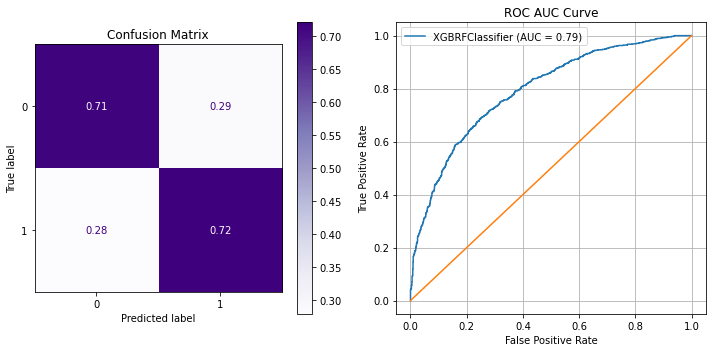

****MODEL PARAMETERS****


,parameters
colsample_bynode,0.8
learning_rate,0.001
reg_lambda,1e-05
subsample,0.3
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bytree,1
gamma,0


In [35]:
# Evaluate best estimating model.
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

We can see that with a macro recall score of 0.7170 on the testing data, this seems to be the model with the best predictive ability! We can also see that the score on the training data is 0.7484, showing that we do not have a serious issue of under or overfitting.

# iNTERPRET

## Best Performing Models
As we saw from our results above, we can conclude that our basic Logistic Regression model log_select and XGBoost gridsearch xgb_grid.best_estimator_ returned the highest recall scores of 0.7275 and 0.7170 respectively.

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7207    0.7256    0.7231      3713
           1     0.7224    0.7175    0.7200      3696

    accuracy                         0.7216      7409
   macro avg     0.7216    0.7215    0.7215      7409
weighted avg     0.7216    0.7216    0.7215      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7268    0.7298    0.7283      1236
           1     0.7282    0.7253    0.7268      1234

    accuracy                         0.7275      2470
   macro avg     0.7275    0.7275    0.7275      2470
weighted avg     0.7275    0.7275    0.7275      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


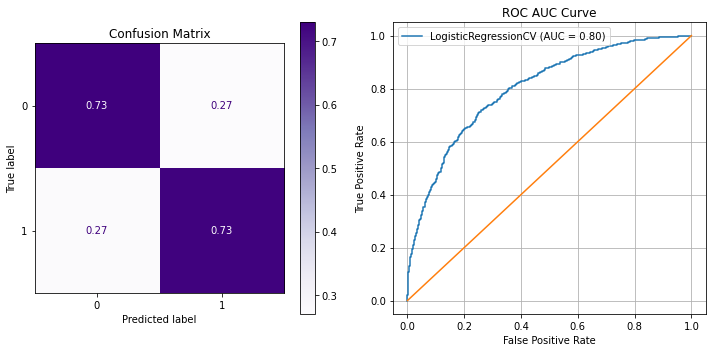

****MODEL PARAMETERS****


,parameters
Cs,10
class_weight,None
cv,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratios,None
max_iter,100
multi_class,auto
n_jobs,None


In [36]:
# Evaluate best estimating Logistic Regression model.
evaluate_model(log_select, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7513    0.7436    0.7474      3713
           1     0.7450    0.7527    0.7489      3696

    accuracy                         0.7481      7409
   macro avg     0.7482    0.7482    0.7481      7409
weighted avg     0.7482    0.7481    0.7481      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7188    0.7136    0.7162      1236
           1     0.7152    0.7204    0.7178      1234

    accuracy                         0.7170      2470
   macro avg     0.7170    0.7170    0.7170      2470
weighted avg     0.7170    0.7170    0.7170      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


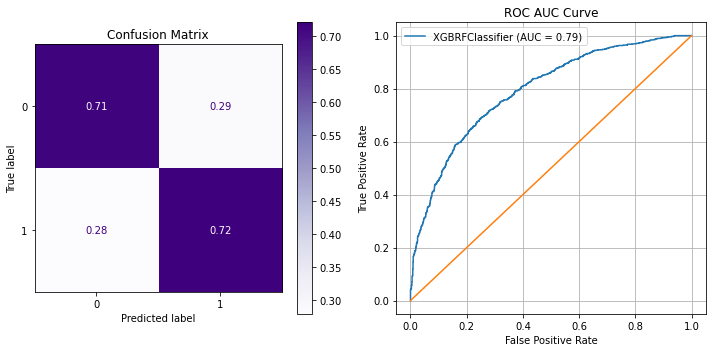

****MODEL PARAMETERS****


,parameters
colsample_bynode,0.8
learning_rate,0.001
reg_lambda,1e-05
subsample,0.3
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bytree,1
gamma,0


In [37]:
# Evaluate best estimating XGBoost model.
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

## Logistic Regression Coefficient Analysis

We found a macro recall score of 0.7275 in our baseline Logistic Regression model and a score of 0.7170 in our gridsearched XGBoost model. This means that our final Logistic Regression model is capable of correctly identifying 72.75% of wins or losses based on the data collected within the first 10 minutes of each match, while our XGBoost model is able to correctly identify 71.70%.

Using our final Logistic Regression and XGBoost models, we can now extract the feature coefficients and importances in order to identify how much impact each of the elements of the game are likely to have on the outcome of each match. Although the model with the best predictive ability was our baseline Logistic Regression model, we will proceed to check feature importance with both the Logistic Regression and XGBoost that were run on df_select in order to compare how our models interpret our features..

Based on these findings, we will be able to provide out final recommendations as to what our eSports coach should focus on while creating a training program for his/her team.

In [38]:
# Extract coefficients from log_grid.best_estimator_ model.
log_coeff = pd.Series(log_select.coef_.flatten(),
               index=X_train_select.columns).sort_values(ascending=False)
log_coeff

blueKills                       0.728298
blueTotalJungleMinionsKilled    0.247880
blueTotalMinionsKilled          0.232926
blueTowersDestroyed             0.119629
blueDragons                     0.099816
blueHeralds                     0.053624
blueFirstBlood                  0.046913
blueAssists                     0.035660
blueWardsDestroyed              0.026762
blueWardsPlaced                -0.006887
redWardsDestroyed              -0.027312
redAssists                     -0.041991
redHeralds                     -0.042458
redTowersDestroyed             -0.044702
redWardsPlaced                 -0.069512
redDragons                     -0.102748
redTotalJungleMinionsKilled    -0.146236
redTotalMinionsKilled          -0.218261
blueDeaths                     -0.693537
dtype: float64

In [39]:
# Convert log coefficients to odds and subtract 1 to display change in odds.
log_odds = np.exp(log_coeff) - 1
log_odds

blueKills                       1.071553
blueTotalJungleMinionsKilled    0.281306
blueTotalMinionsKilled          0.262288
blueTowersDestroyed             0.127079
blueDragons                     0.104967
blueHeralds                     0.055087
blueFirstBlood                  0.048031
blueAssists                     0.036303
blueWardsDestroyed              0.027124
blueWardsPlaced                -0.006864
redWardsDestroyed              -0.026942
redAssists                     -0.041122
redHeralds                     -0.041569
redTowersDestroyed             -0.043718
redWardsPlaced                 -0.067151
redDragons                     -0.097646
redTotalJungleMinionsKilled    -0.136046
redTotalMinionsKilled          -0.196084
blueDeaths                     -0.500195
dtype: float64

In [40]:
# Change name of columns
renamed_cols = {'blueKills': 'Kills',
                'blueTotalJungleMinionsKilled': 'Total Jungle Minions Killed',
                'blueTotalMinionsKilled': 'Total Minions Killed',
                'blueTowersDestroyed': 'Towers Destroyed',
                'blueDragons': 'Dragons Killed',
                'blueHeralds': 'Heralds Killed',
                'blueFirstBlood': 'First Blood',
                'blueAssists': 'Assists',
                'blueWardsDestroyed': 'Wards Destroyed',
                'blueWardsPlaced': 'Wards Placed',
                'redWardsDestroyed': 'Enemy Wards Destroyed',
                'redHeralds': 'Enemy Heralds Killed',
                'redTowersDestroyed': 'Enemy Towers Destroyed',
                'redAssists': 'Enemy Assists',
                'redWardsPlaced': 'Enemy Wards Placed',
                'redDragons': 'Enemy Dragons Killed',
                'redTotalJungleMinionsKilled': 'Enemy Total Jungle Minions Killed',
                'redTotalMinionsKilled': 'Enemy Total Minions Killed',
                'blueDeaths': 'Enemy Kills'
               }

log_odds.rename(renamed_cols, inplace=True)
log_odds

Kills                                1.071553
Total Jungle Minions Killed          0.281306
Total Minions Killed                 0.262288
Towers Destroyed                     0.127079
Dragons Killed                       0.104967
Heralds Killed                       0.055087
First Blood                          0.048031
Assists                              0.036303
Wards Destroyed                      0.027124
Wards Placed                        -0.006864
Enemy Wards Destroyed               -0.026942
Enemy Assists                       -0.041122
Enemy Heralds Killed                -0.041569
Enemy Towers Destroyed              -0.043718
Enemy Wards Placed                  -0.067151
Enemy Dragons Killed                -0.097646
Enemy Total Jungle Minions Killed   -0.136046
Enemy Total Minions Killed          -0.196084
Enemy Kills                         -0.500195
dtype: float64

In [41]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('darkgrid')

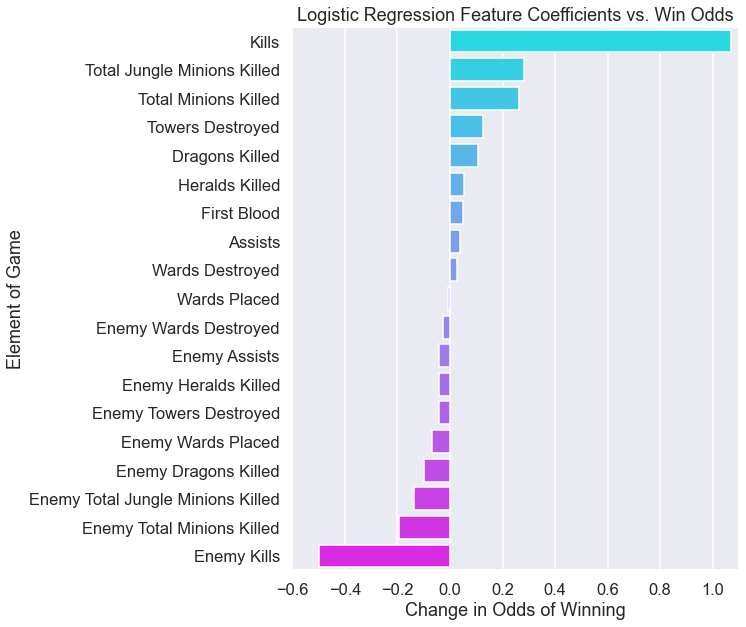

In [42]:
# Create bar plot of feature coefficients as odds.
fig, ax = plt.subplots(figsize=(8,10))

sns.barplot(x=log_odds.values, y=log_odds.index, palette='cool', ax=ax, orient='h')

ax.set_title('Logistic Regression Feature Coefficients vs. Win Odds')
ax.set_xlabel('Change in Odds of Winning')
ax.set_ylabel('Element of Game')
ax.set_xlim([-.6, 1.1]);

# ax.set_xticks([-.15,.15])
# ax.set_xticklabels(['Decrease in Odds','Increase in Odds'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

According to our bar plot based on the Logistic Regression model, we see that champion kills and deaths within the first 10 minutes of the match have by far the most impact on the outcome of a match. We can see that total lane minions and total jungle creeps and dragons are also of high importance. Surprisingly, Heralds, vision wards, and towers are of least importance.

Because our displayed units are in odds, we can see that 1 standard deviation increase in each of the above features will result in the corresponding percent increase or decrease in the odds of winning.

## XGBoost Random Forest Feature Importance

Now we will take a look at the feature importance rankings from our XGBoost model to compare to the size of coefficients found in our Logistic Regression Model.

In [43]:
# Extract coefficients from log_grid.best_estimator_ model.
xgb_importance = pd.Series(xgb_grid_refined.best_estimator_.feature_importances_,
               index=X_train_select.columns).sort_values(ascending=False)
xgb_importance

blueDeaths                      0.214489
blueKills                       0.207201
redAssists                      0.054563
blueAssists                     0.047393
blueDragons                     0.044516
redDragons                      0.040089
redTotalMinionsKilled           0.038902
blueTotalJungleMinionsKilled    0.038506
blueHeralds                     0.038341
blueTotalMinionsKilled          0.036608
blueFirstBlood                  0.034998
redHeralds                      0.032259
redTotalJungleMinionsKilled     0.032182
redWardsDestroyed               0.027487
redWardsPlaced                  0.026576
blueWardsPlaced                 0.024276
blueWardsDestroyed              0.023949
blueTowersDestroyed             0.021145
redTowersDestroyed              0.016519
dtype: float32

In [44]:
# Change name of columns
xgb_importance.rename(renamed_cols, inplace=True)
xgb_importance

Enemy Kills                          0.214489
Kills                                0.207201
Enemy Assists                        0.054563
Assists                              0.047393
Dragons Killed                       0.044516
Enemy Dragons Killed                 0.040089
Enemy Total Minions Killed           0.038902
Total Jungle Minions Killed          0.038506
Heralds Killed                       0.038341
Total Minions Killed                 0.036608
First Blood                          0.034998
Enemy Heralds Killed                 0.032259
Enemy Total Jungle Minions Killed    0.032182
Enemy Wards Destroyed                0.027487
Enemy Wards Placed                   0.026576
Wards Placed                         0.024276
Wards Destroyed                      0.023949
Towers Destroyed                     0.021145
Enemy Towers Destroyed               0.016519
dtype: float32

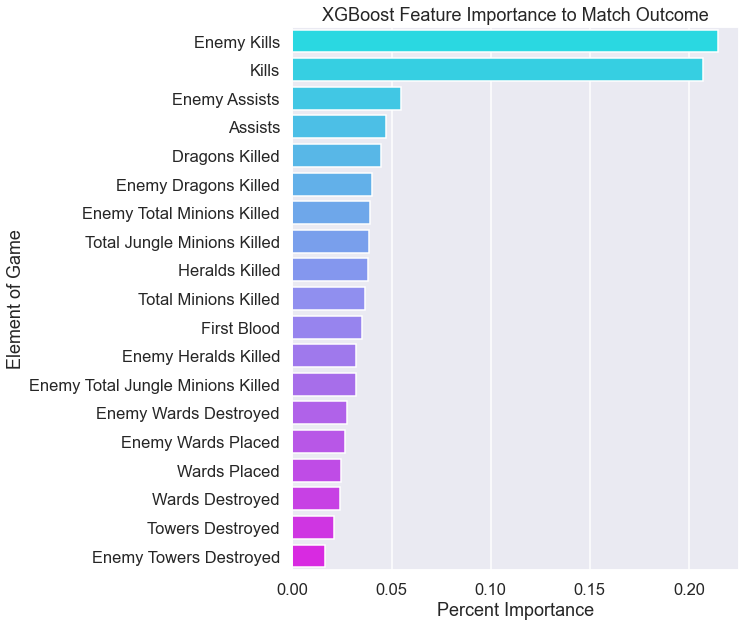

In [45]:
# Create bar plot of feature importances.
fig, ax = plt.subplots(figsize=(8,10))

sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette='cool', ax=ax, orient='h')

ax.set_title('XGBoost Feature Importance to Match Outcome')
ax.set_xlabel('Percent Importance')
ax.set_ylabel('Element of Game');

## Individual Features vs. Win Rate

Now, let's take a look at what win rates we get against individual features that were either of high importance, or that we might have expected to be significant.

### Win or Loss vs Minions Killed at 10 minutes

In [46]:
# Create series that displays the mean total minions killed for matches that
# resulted in losses and wins.
df_viz = df.copy()
df_minions = df_viz.groupby('blueWins').agg('mean')['blueTotalMinionsKilled']
df_minions

blueWins
0    211.793090
1    221.624949
Name: blueTotalMinionsKilled, dtype: float64

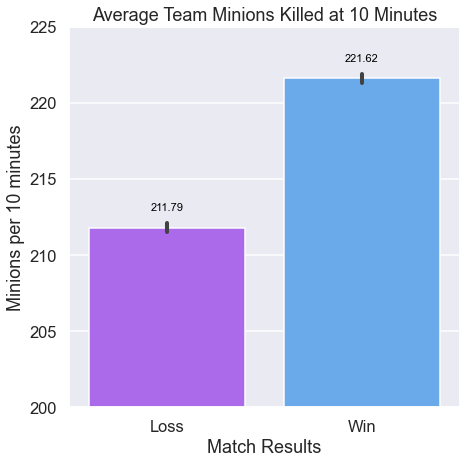

In [47]:
# Create bar plot of mean number of minions killed for losses and wins
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(data=df_viz, x='blueWins', y='blueTotalMinionsKilled', palette='cool_r', ax=ax, ci=68)

ax.set_title('Average Team Minions Killed at 10 Minutes')
ax.set_xlabel('Match Results')
ax.set_ylabel('Minions per 10 minutes')
ax.set_xticklabels(['Loss','Win'])

# Method for displaying values at the top of bars found at:
# https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart
x_axis = ax.get_xticklabels()
y_axis = [df_minions.values]

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points')

ax.set_ylim([200, 225]);

We can see that there is a difference of approximately 10 in the number of total minions killed at the 10 minute mark that would make the difference between a loss and a win. In order to maximize our chances of winning, we want to make sure that the team reaches a total minion kill count of above 222 within 10 minutes of the match start.

### Win or Loss vs Jungle Minions Killed at 10 minutes

In [48]:
# Create series that displays the mean jungle minions killed for matches that
# resulted in losses and wins.
df_jungle = df_viz.groupby('blueWins')\
                  .agg('mean')['blueTotalJungleMinionsKilled']
df_jungle

blueWins
0    49.211154
1    51.813185
Name: blueTotalJungleMinionsKilled, dtype: float64

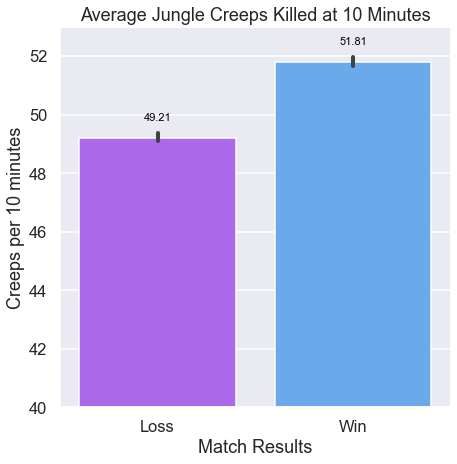

In [49]:
# Create bar plot of mean number of jungle minions killed for losses and wins
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(data=df_viz, x='blueWins', y='blueTotalJungleMinionsKilled', palette='cool_r', ax=ax, ci=68)

ax.set_title('Average Jungle Creeps Killed at 10 Minutes')
ax.set_xlabel('Match Results')
ax.set_ylabel('Creeps per 10 minutes')
ax.set_xticklabels(['Loss','Win'])

x_axis = ax.get_xticklabels()
y_axis = [df_jungle.values]

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., 
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points')

ax.set_ylim([40, 53]);

Although the difference in the total number of jungle creeps killed between losses and wins is smaller than we saw in the difference in lane minion kills, we want to make sure to have our jungler is able to clear more than 52 jungle creeps in order to maximize the odds of winning.

### Kill Count vs Win Rate

In [50]:
# Calculate percent of games won for each number of kills per game

# Calculate total matches for each kill count
df_kills = df.copy()
df_kills_total = df_kills.groupby('blueKills').count()
df_kills_total = df_kills_total[['blueWins']]
# Calculate number of won matches for each kill count
df_kills_won = df_kills.groupby('blueKills').sum()
df_kills_percent_won = df_kills_won['blueWins'] / df_kills_total['blueWins']
# Display percent of wins per kill count
df_kills_percent_won

blueKills
0     0.142857
1     0.191693
2     0.244663
3     0.278081
4     0.407251
5     0.422427
6     0.510590
7     0.556239
8     0.599788
9     0.687587
10    0.707780
11    0.747059
12    0.803922
13    0.897959
14    0.843750
15    0.842105
16    0.966667
17    1.000000
18    1.000000
19    1.000000
22    1.000000
Name: blueWins, dtype: float64

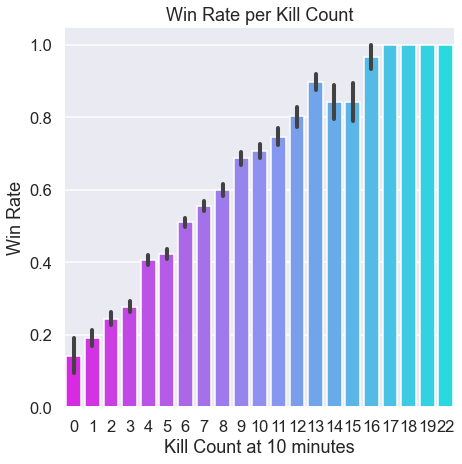

In [51]:
# Create bar plot of kills vs win rates.
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(data=df_viz, x='blueKills', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win Rate per Kill Count')
ax.set_xlabel('Kill Count at 10 minutes')
ax.set_ylabel('Win Rate');

This bar plot indicates that there clearly does seem to be a correlation between the number of kills scored by the 10 minute mark and the likelihood of the match resulting in a win.

### Dragons vs Win Rate

In [52]:
# Calculate percent of games won for dragons killed or not

# Calculate total matches for dragons killed or not
df_drag = df.copy()
df_drag_total = df_drag.groupby('blueDragons').count()
df_drag_total = df_drag_total[['blueWins']]
# Calculate number of won matches for dragons killed or not
df_drag_won = df_drag.groupby('blueDragons').sum()
df_drag_percent_won = df_drag_won['blueWins'] / df_drag_total['blueWins']
# Display percent of wins for dragons killed or not
df_drag_percent_won

blueDragons
0    0.418531
1    0.640940
Name: blueWins, dtype: float64

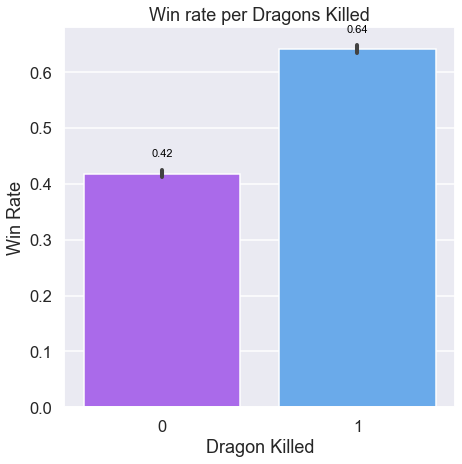

In [53]:
# Create bar plot of Dragons vs win rate
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(data=df_viz, x='blueDragons', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win rate per Dragons Killed')
ax.set_xlabel('Dragon Killed')
ax.set_ylabel('Win Rate')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points');

We can see here again, that there is a large difference in win rate if the dragon is killed or not.

### Heralds vs Win Rate

In [54]:
# Calculate percent of games won for Herald killed or not

# Calculate total matches for Herald killed or not
df_herald = df.copy()
df_herald_total = df_herald.groupby('blueHeralds').count()
df_herald_total = df_herald_total[['blueWins']]
# Calculate number of won matches for Herald killed or not
df_herald_won = df_herald.groupby('blueHeralds').sum()
df_herald_percent_won = df_herald_won['blueWins'] / df_herald_total['blueWins']
#Display percent of wins for Herald killed or not
df_herald_percent_won

blueHeralds
0    0.476814
1    0.595046
Name: blueWins, dtype: float64

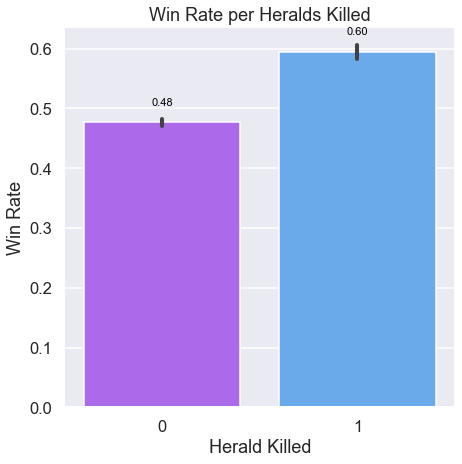

In [55]:
# Create bar plot of Heralds vs win rate
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(data=df_viz, x='blueHeralds', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win Rate per Heralds Killed')
ax.set_xlabel('Herald Killed')
ax.set_ylabel('Win Rate')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points');

Although there is a fairly large difference in the win rate between if the Rift Herald is killed or not, we know from our model's coefficients and importances that this aspect of the game is less of a priority compared to some other features previously discussed.

Below, we can see the standard deviation for each of our features so we know how much of an increase in each of our important features we would need to see in order to change the outcome of a match according to our Logistic Regression odds graph shown above.

In [56]:
df_select.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.361980,0.187974,0.051422,216.699565,50.509667,22.367952,2.723150,6.662112,0.413098,0.160036,0.043021,217.349226,51.313088
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.480597,0.390712,0.244369,21.858437,9.898282,18.457427,2.138356,4.060612,0.492415,0.366658,0.216900,21.911668,10.027885
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,4.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,202.000000,44.000000,14.000000,1.000000,4.000000,0.000000,0.000000,0.000000,203.000000,44.000000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,218.000000,50.000000,16.000000,2.000000,6.000000,0.000000,0.000000,0.000000,218.000000,51.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,0.000000,0.000000,232.000000,56.000000,20.000000,4.000000,9.000000,1.000000,0.000000,0.000000,233.000000,57.000000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,1.000000,1.000000,4.000000,283.000000,92.000000,276.000000,24.000000,28.000000,1.000000,1.000000,2.000000,289.000000,92.000000


# CONCLUSIONS & RECOMMENDATIONS

Based on the above findings, we can see that champion kills and assists, lane minions, jungle minions, and dragons have the highest impact on the outcome of a high ranking League of Legends match.

My primary recommendation would be to focus heavily on the Jungler role. While optimizing an efficient jungle clearing path to maximize the number of jungle creeps killed, we want to make sure to capitalize on any early champion kills that might be possible if the Jungler can execute an effective gank.

My secondary recommendation would be to have all laners heavily drill last hitting minions to maximize the number of minion kills in the early stages of the match. There are a total of 107 minions that spawn per lane within the first 10 minutes of the match, and we want to aim for a team total of 222 minions or more. This means that each laner must kill at least 74 minions, while avoiding death and if possible, securing champion kills.

Lastly, since dragons are also of high importance, the Support role should place vision wards close to the dragon pit in order to maintain map control in that area, while the AD Carry role focuses on securing minions kills within his/her lane.

Some considerations for further analysis would include:
1. Whether we can find additional features outside of the scope of the selected dataset to improve the predictive capability of our models.
2. Analyzing data collected at the end of each match to identify what elements of the game led to a quicker vs. slower victory so that we can adjust the team strategy mid-game to increase the odds of winning.
3. Collect data on the specific eSports team's actual performance to identify what areas need to be targeted.